In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [94]:
start_date = '1973-02-21'
end_date = '2019-12-05'
pred_end_date = '2020-02-1'

SNE = pd.read_csv('gdrive/My Drive/Proyek probstok/Data saham SONY dari tahun 1973.csv')

print(SNE)

             Date       Open       High  ...      Close  Adj Close   Volume
0      1973-02-21   0.000000   7.927273  ...   7.763637   5.227560   377800
1      1973-02-22   0.000000   7.763637  ...   7.581818   5.105133   225400
2      1973-02-23   0.000000   7.563636  ...   7.436364   5.007195   173000
3      1973-02-26   0.000000   7.454545  ...   7.327273   4.933739   421800
4      1973-02-27   0.000000   7.327273  ...   7.163636   4.823556   250800
...           ...        ...        ...  ...        ...        ...      ...
11799  2019-11-29  63.259998  63.599998  ...  63.480000  63.480000   952800
11800  2019-12-02  63.459999  63.560001  ...  63.279999  63.279999  1515400
11801  2019-12-03  64.400002  64.629997  ...  64.589996  64.589996  1648100
11802  2019-12-04  65.269997  65.559998  ...  65.290001  65.290001  1123800
11803  2019-12-05  65.160004  65.290001  ...  65.199997  65.199997   741700

[11804 rows x 7 columns]


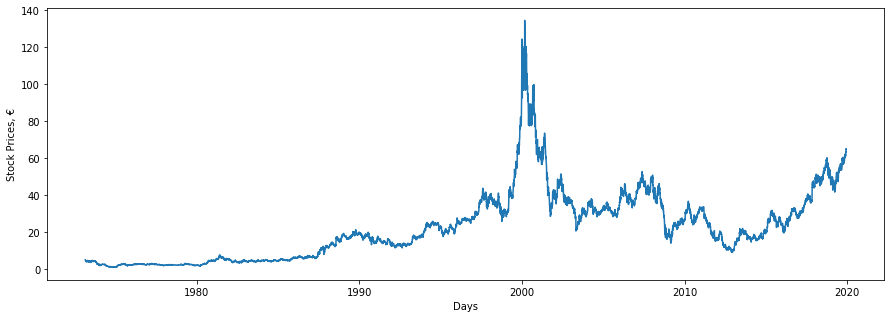

In [114]:
plt.figure(figsize = (15, 5))
plt.plot(SNE['Date'], SNE['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()


In [95]:
SNE['Date'] = pd.to_datetime(SNE['Date'])
print(SNE)

            Date       Open       High  ...      Close  Adj Close   Volume
0     1973-02-21   0.000000   7.927273  ...   7.763637   5.227560   377800
1     1973-02-22   0.000000   7.763637  ...   7.581818   5.105133   225400
2     1973-02-23   0.000000   7.563636  ...   7.436364   5.007195   173000
3     1973-02-26   0.000000   7.454545  ...   7.327273   4.933739   421800
4     1973-02-27   0.000000   7.327273  ...   7.163636   4.823556   250800
...          ...        ...        ...  ...        ...        ...      ...
11799 2019-11-29  63.259998  63.599998  ...  63.480000  63.480000   952800
11800 2019-12-02  63.459999  63.560001  ...  63.279999  63.279999  1515400
11801 2019-12-03  64.400002  64.629997  ...  64.589996  64.589996  1648100
11802 2019-12-04  65.269997  65.559998  ...  65.290001  65.290001  1123800
11803 2019-12-05  65.160004  65.290001  ...  65.199997  65.199997   741700

[11804 rows x 7 columns]


In [96]:
print(SNE.head())
print(SNE.tail())

        Date  Open      High       Low     Close  Adj Close  Volume
0 1973-02-21   0.0  7.927273  7.672727  7.763637   5.227560  377800
1 1973-02-22   0.0  7.763637  7.581818  7.581818   5.105133  225400
2 1973-02-23   0.0  7.563636  7.400000  7.436364   5.007195  173000
3 1973-02-26   0.0  7.454545  7.181818  7.327273   4.933739  421800
4 1973-02-27   0.0  7.327273  7.163636  7.163636   4.823556  250800
            Date       Open       High  ...      Close  Adj Close   Volume
11799 2019-11-29  63.259998  63.599998  ...  63.480000  63.480000   952800
11800 2019-12-02  63.459999  63.560001  ...  63.279999  63.279999  1515400
11801 2019-12-03  64.400002  64.629997  ...  64.589996  64.589996  1648100
11802 2019-12-04  65.269997  65.559998  ...  65.290001  65.290001  1123800
11803 2019-12-05  65.160004  65.290001  ...  65.199997  65.199997   741700

[5 rows x 7 columns]


In [0]:
returns = (SNE.loc[1:, 'Adj Close'] - \
           SNE.shift(1).loc[1:, 'Adj Close']) / \
           SNE.shift(1).loc[1:, 'Adj Close']
           

In [98]:
print(returns.tolist())

[-0.023419530335376196, -0.019184221057512305, -0.01467008974086276, -0.022332555491889648, 0.020304314907922564, -0.022387912615983382, -0.015267142254099877, -0.05684741923459924, 0.01369870984215579, 0.03783796671594118, -0.010416852792050908, -0.03684223310414247, -0.04371574943117969, 0.011428077999759494, 0.03954841107901, -0.01086998501747961, -0.002747135614070875, -0.011019262670239336, -0.0027853961692499113, -0.04469264565494735, -0.023391523746197754, 0.029940046539439248, 0.02906922351790235, 0.04802308707748067, 0.010781866402699413, 0.024000048791655088, -0.015625172830714004, -0.005290992714269414, -0.0026594594923392335, -0.013333408844228154, 0.0, 0.03243213291017401, 0.023560479788395376, 0.01790287474233983, -0.015075750221599661, 0.010204268743735926, -0.010101193451128148, -0.03826533057446533, -0.013262463838704646, 0.0, -0.01881705319461943, -0.02365143918919082, -0.04213497825726184, -0.029325141277547297, 0.015105542815924678, -0.002976395021241229, -0.0149251

In [99]:
#Parameter Assigment 
So = SNE.loc[SNE.shape[0] - 1, "Adj Close"]
print (So)

65.199997


In [0]:
dt = 1 # day   # User input


In [0]:
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()

In [0]:
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

In [84]:
# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
print(drift)

[0.00021239 0.00042477 0.00063716 0.00084954 0.00106193 0.00127431
 0.0014867  0.00169908 0.00191147 0.00212385 0.00233624 0.00254862
 0.00276101 0.00297339 0.00318578 0.00339816 0.00361055 0.00382293
 0.00403532 0.0042477  0.00446009 0.00467247 0.00488486 0.00509724
 0.00530963 0.00552201 0.0057344  0.00594678 0.00615917 0.00637155
 0.00658394 0.00679632 0.00700871 0.00722109 0.00743348 0.00764586
 0.00785825 0.00807063 0.00828302 0.0084954  0.00870779]


In [85]:
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

{'1': array([ 0.02305058,  0.03726888, -0.00329673, -0.02581986,  0.00721988,
       -0.0359196 , -0.06144953, -0.05646091, -0.04192659, -0.03054642,
        0.02204192,  0.0873655 ,  0.05586248,  0.08118661,  0.08801468,
        0.08230452,  0.08258973,  0.0818129 ,  0.06389802,  0.0780287 ,
        0.10381501,  0.13112043,  0.13581297,  0.14979383,  0.11484056,
        0.09859269,  0.12499447,  0.11202914,  0.13222103,  0.12153415,
        0.15230395,  0.1636859 ,  0.17256953,  0.19432868,  0.22529863,
        0.23572234,  0.25303525,  0.2693928 ,  0.22106057,  0.26514797,
        0.28144768]), '2': array([ 0.04303049,  0.03788039,  0.05081677,  0.01980029,  0.02242755,
        0.00260816, -0.03340265, -0.03243034, -0.05670145, -0.07775876,
       -0.08006989, -0.09778885, -0.10240916, -0.10788137, -0.1549121 ,
       -0.21266127, -0.18585542, -0.20225723, -0.24436317, -0.24518573,
       -0.24472124, -0.21633008, -0.19512851, -0.1703255 , -0.16674724,
       -0.12965073, -0.12882177

In [86]:
# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S)

[[65.199997   66.73452162 67.70452914 ... 82.00686877 85.72142467
  87.14861538]
 [65.199997   68.081281   67.74594326 ... 52.73150548 51.71374754
  50.42523436]
 [65.199997   65.36893868 67.68822558 ... 75.22548816 71.93849206
  71.98019259]
 ...
 [65.199997   65.04520967 65.16980982 ... 74.34886571 74.9218297
  73.81523031]
 [65.199997   65.15010611 65.02866813 ... 83.46984823 81.15796494
  82.70670733]
 [65.199997   66.07276598 66.32221037 ... 72.53400237 72.58408308
  73.07960034]]


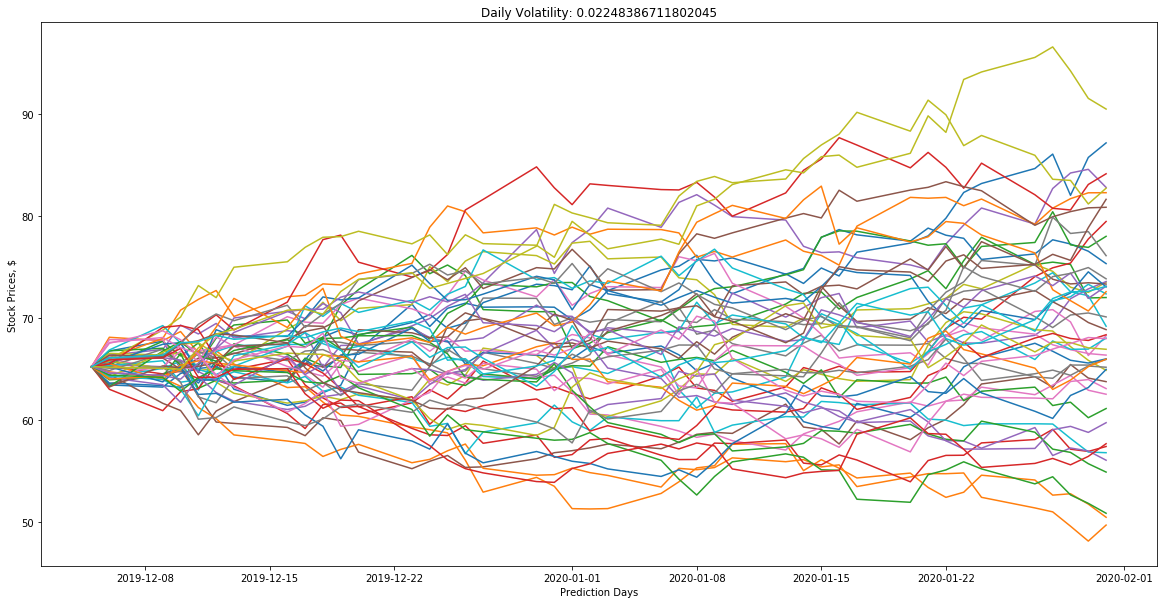

In [91]:
# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = SNE["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, $')
    plt.xlabel('Prediction Days')
plt.show()

In [0]:
# Dataframe format for predictions - first 10 scenarios only
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :10]).set_index(
           pd.date_range(start = SNE["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False)